### 1.Write a program that uses an if-else ladder.

In [122]:
marks = float(input("enter marks obtained:"))
if marks > 90:
    print("Congratulation!,Your grade is A")
elif (marks > 80) & (marks <= 90):
    print("Your grade is B")
elif (marks > 60) & (marks <= 80):
    print("Your grade is C")
else:
    print("Your grade is D")

enter marks obtained:67
Your grade is C


### 2. Write 5 different functions and call them in one program.

In [124]:
def f1():
    print("Harry")

def f2():
    f4()
    print("John")

def f3():
    f2()
    print("Hi")
    f1()

def f4():
    print("Hi")

f3()

Hi
John
Hi
Harry


### 3.Read any dataset from https://archive.ics.uci.edu/ml/index.phpand perform a missing value treatment, check for distribution of each variable, find the correlation matrix and write conclusions from the matrix.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip")

In [4]:
df

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
2075254,26/11/2010;20:58:00;0.946;0.000;240.430;4.000;...
2075255,26/11/2010;20:59:00;0.944;0.000;240.000;4.000;...
2075256,26/11/2010;21:00:00;0.938;0.000;239.820;3.800;...
2075257,26/11/2010;21:01:00;0.934;0.000;239.700;3.800;...


In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip",delimiter = ";")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
per_missing = (df['Sub_metering_3'].isnull().sum() / 2075259)*100
per_missing.round(2)

1.25

#### A) Missing Value Treatment

##### We can either 'Fill' the missing values or 'Delete' them

#### Fill
##### 1. Replace with mean

In [9]:
mean = df['Sub_metering_3'].mean()
df['Sub_metering_3'].fillna(mean)
#--------------
#In case of outliers this treatment would not be appropriate

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

#####  2. Replace with mode

In [10]:
mode = df['Sub_metering_3'].mode()
df['Sub_metering_3'].fillna(mode)
#-----------------------------------
#used in case of categorical data

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

##### 3. Replace with median

In [11]:
median = df['Sub_metering_3'].median()
df['Sub_metering_3'].fillna(median)

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

##### 4.Forward fill and Backward fill

In [12]:
df['Sub_metering_3'].fillna(method = 'ffill')

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

In [13]:
df['Sub_metering_3'].fillna(method = 'bfill')

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

In [14]:
#in all the above methods I havent stored the changes to a variable nr given "inplace = True" 
# So the missing values havent been filled yet

#### Delete

##### Deleting the row, results in loss of data even if one of the columns have missing value.

In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

#### B)Check for distribution of each variable

In [17]:
import matplotlib as plt

In [18]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


In [26]:
df['Global_active_power'] = df['Global_active_power'].astype('float64')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float64')
df['Voltage'] = df['Voltage'].astype('float64')
df['Global_intensity'] = df['Global_intensity'].astype('float64')
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float64')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [28]:
df['Date'] = df['Date'].astype('datetime64')
df['Time'] = df['Time'].astype('datetime64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 156.3 MB


array([[<AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>,
        <AxesSubplot:title={'center':'Voltage'}>],
       [<AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Sub_metering_1'}>,
        <AxesSubplot:title={'center':'Sub_metering_2'}>],
       [<AxesSubplot:title={'center':'Sub_metering_3'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

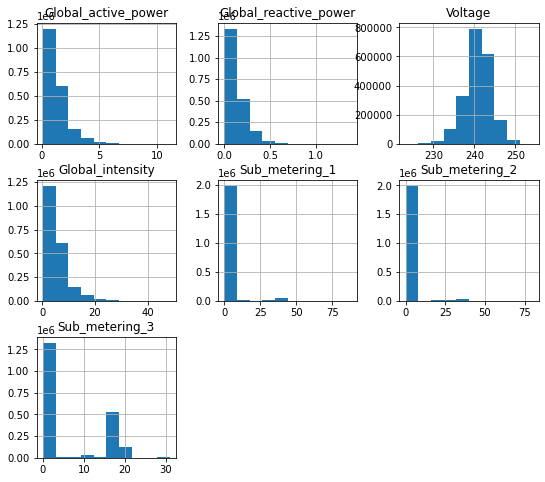

In [33]:
df.hist(figsize = (9,8), column = ['Global_active_power','Global_reactive_power','Voltage',
                                   'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

#### C) Find the correlation matrix and write conclusions from the matrix.

In [43]:
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.250000,-0.400000,1.000000,0.480000,0.430000,0.640000
Global_reactive_power,0.250000,1.000000,-0.110000,0.270000,0.120000,0.140000,0.090000
Voltage,-0.400000,-0.110000,1.000000,-0.410000,-0.200000,-0.170000,-0.270000
Global_intensity,1.000000,0.270000,-0.410000,1.000000,0.490000,0.440000,0.630000
Sub_metering_1,0.480000,0.120000,-0.200000,0.490000,1.000000,0.050000,0.100000
Sub_metering_2,0.430000,0.140000,-0.170000,0.440000,0.050000,1.000000,0.080000
Sub_metering_3,0.640000,0.090000,-0.270000,0.630000,0.100000,0.080000,1.000000


##### Attribute Information:

##### 1.date: Date in format dd/mm/yyyy
#####  2.time: time in format hh:mm:ss
##### 3.global_active_power: household global minute-averaged active power (in kilowatt)
##### 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
##### 5.voltage: minute-averaged voltage (in volt)
##### 6.global_intensity: household global minute-averaged current intensity (in ampere)
##### 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
##### 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
##### 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

##### The dark color shows the high correlation between the variables and the light colors shows less correlation between the variables.

### Conclusions
#### 1. The correlation is highest between 'gloabal active power' and 'sub_metering_3', as in the water heater and air conditioners contribute to the gloabal active power


### 4.Read a dataset and perform slice it in different ways

##### Slice row labels

In [44]:
df.loc[100:200]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
100,2006-12-16,2022-04-22 19:04:00,3.366,0.000,232.78,14.4,0.0,1.0,17.0
101,2006-12-16,2022-04-22 19:05:00,3.404,0.082,233.08,14.6,0.0,2.0,16.0
102,2006-12-16,2022-04-22 19:06:00,3.382,0.074,233.69,14.4,0.0,0.0,17.0
103,2006-12-16,2022-04-22 19:07:00,3.616,0.106,234.44,15.4,0.0,4.0,17.0
104,2006-12-16,2022-04-22 19:08:00,3.476,0.092,234.60,14.8,0.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...
196,2006-12-16,2022-04-22 20:40:00,3.232,0.078,233.63,13.8,0.0,0.0,17.0
197,2006-12-16,2022-04-22 20:41:00,3.254,0.074,234.43,13.8,0.0,0.0,17.0
198,2006-12-16,2022-04-22 20:42:00,3.376,0.050,234.63,14.4,0.0,0.0,17.0
199,2006-12-16,2022-04-22 20:43:00,3.372,0.048,235.05,14.2,0.0,0.0,17.0


##### Slice single column label

In [45]:
df.loc[100:105,'Global_intensity']

100    14.4
101    14.6
102    14.4
103    15.4
104    14.8
105    14.4
Name: Global_intensity, dtype: float64

##### Slice multiple column label

In [46]:
df.loc[100:105,['Global_intensity','Sub_metering_2']]

,Global_intensity,Global_reactive_power
100,14.4,0.000
101,14.6,0.082
102,14.4,0.074
103,15.4,0.106
104,14.8,0.092
105,14.4,0.064


In [47]:
df.loc[100:105,'Time':'Global_reactive_power']

,Time,Global_active_power,Global_reactive_power
100,2022-04-22 19:04:00,3.366,0.000
101,2022-04-22 19:05:00,3.404,0.082
102,2022-04-22 19:06:00,3.382,0.074
103,2022-04-22 19:07:00,3.616,0.106
104,2022-04-22 19:08:00,3.476,0.092
105,2022-04-22 19:09:00,3.394,0.064


##### single row integer index

In [48]:
df.iloc[0]

Date                     2006-12-16 00:00:00
Time                     2022-04-22 17:24:00
Global_active_power                    4.216
Global_reactive_power                  0.418
Voltage                               234.84
Global_intensity                        18.4
Sub_metering_1                           0.0
Sub_metering_2                           1.0
Sub_metering_3                          17.0
Name: 0, dtype: object

In [49]:
df.iloc[-1]

Date                     2010-11-26 00:00:00
Time                     2022-04-22 21:02:00
Global_active_power                    0.932
Global_reactive_power                    0.0
Voltage                               239.55
Global_intensity                         3.8
Sub_metering_1                           0.0
Sub_metering_2                           0.0
Sub_metering_3                           0.0
Name: 2075258, dtype: object

### Bonus - 5.Can we find correlation between two categorical variables? How?